In [5]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
Rx = PolynomialRing(QQ, 'x')
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
R.<x> = PolynomialRing(QQ)
Scplx= PowerSeriesRing(CC,'x',default_prec=300)
def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNewStep(n,m): 
    f=J(n,m)
    fl=f.list()
    return (sum(c*x**i*(m**3*2**6)**i for i,c in enumerate(fl)))
def xjNew(n,m):
    return xjNewStep(n-1,m)
def xjNewCoefficient(n,m):
    if n>0:return (xjNew(n,m)-xjNew(n-1,m))/x^n
    if n==0:return 1
def xjNewTest(n,m):
    return D(xjNewStep(n-1,m))
def j(n,m):return xjNew(n,m)/x
def H4(n,m):
    jay=j(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-2^6*m^3)
    return ((S(numerator/denominator)^(1/(m-2))).O(n+1)).polynomial()
def H6(n,m): #different than in draft 4mar21 and Mathematica.
    def base6(n,m):
        jay=j(n+1,m)
        num=(x*derivative(jay,x))^m # chain rule; variable is tau not x.
        den = expand(jay^(m-1)*(j(n+1,m)-2^6*m^3))
        return L((-1)^m*(num/den)).O(n+1)
    return (S(base6(n,m)^(1/(m-2))).polynomial())
def deltaStar(n,m):
    jay=j(n+1,m)
    djay=x*derivative(jay,x)
    numerator=djay^(2*m)
    denominator=jay^(2*m-2)*(jay-2^6*m^3)^m
    base=numerator/denominator
    xp=1/(m-2)
    power=S(base)^xp
    return (power.polynomial()).truncate(n+1)
def polynomialCoefficient(n,poly):
    return poly.list()[n]
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})
def deltaDiamond(n,m):
    return D(S(expand((H4(n+2,m)^3)/j(n+2,m)))).truncate(n+1)
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)
def deltaDagger(n,m):
    def ddstep1(n,m):
        return D(S(expand((H4(n+2,m)^3)))).truncate(n+1)
    def ddstep2(n,m):
        return D(S((H6(n+2,m)^2))).truncate(n+1)
    return (ddstep1(n,m)-ddstep2(n,m))/1728
def first(list):return list[0]
def last(list):return list[-1]

def rmnjntau(n):
    answer=0
    for k in [1..n-1]:
        answer=answer+(6*k-4*(n-k))*sigma(k,3)*sigma(n-k,5)
    answer=(5*sigma(n,3)+7*sigma(n,5))*n/12-35*answer
    return answer

def element(k,listo):
    if k>len(listo):return (print("bad k"))
    return listo[k-1]

def mobiusInverseOfFunction(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        f=f+moebius(dvk)*g(n/dvk)
    return f

def mobiusInverseOfList(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        gndvk=element(n/dvk,g)
        f=f+moebius(dvk)*gndvk
    return f

def drop_first_element(listo):
    lenth=len(listo)
    answer=[]
    for k in [1..lenth-1]:
        answer=answer+[listo[k]]
    return answer

def factorSeriesFromLists(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
    return nswr

def factorSeriesFromListsWithTracking(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
            print((n,k))
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
        print("answer length: ",len(nswr))
    return nswr

def deltaInfty(n,m): 
    # definition 9.1 in the paper to power (m-2)
    # so, per remark 5 in paper v. 28jul21,
    # the weight is 12 for each m.
    jay=J(n,m)
    djay=x*derivative(jay,x)
    numerator=djay^(2*m)
    denominator=jay^(2*m-2)*(jay-1)^m
    answer=S((numerator/denominator)^(1/(m-2)))
    return answer.polynomial()
            
def deltaInftyStrike(n,m): 
    # substitute 2^6*m^3*x for x in def 9.1 of interpolations paper; not
    # yet defined in draft  21h28jul21
    f=deltaInfty(n,m)
    fl=f.list()
    df=f.degree()
    sm=sum(fl[k]*(x*m^3*2^6)^k for k in [0..df])
    dsm=sm.degree()
    sml=sm.list()
    notzero=[]
    for entry in sml:
        if (entry!=0):notzero=notzero+[entry]
    leadingterm=notzero[0]
    sm2=sum(fl[k]*(x*m^3*2^6)^k/leadingterm for k in [0..dsm])
    return sm2

def H(n,m): # definition 8.1 (13aug21)
    jay=J(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-1)
    power = 1/(m-2)
    frac=numerator/denominator
    return ((S(frac^power)).O(n+1)).polynomial()

def deltaDiamond(n,m):
    return D(S(expand((H(n+2,m)^3)/J(n+2,m)))).truncate(n+1)

def deltaDiamondStrike(n,m): 
    # substitute 2^6*m^3*x for x in def 9.1; not
    # yet defined in draft  21h28jul21
    f=deltaDiamond(n,m)
    fl=f.list()
    df=f.degree()
    sm=sum(fl[k]*(x*m^3*2^6)^k for k in [0..df])
    dsm=sm.degree()
    sml=sm.list()
    notzero=[]
    for entry in sml:
        if (entry!=0):notzero=notzero+[entry]
    leadingterm=notzero[0]
    sm2=sum(fl[k]*(x*m^3*2^6)^k/leadingterm for k in [0..dsm])
    return sm2
        

def deltaDiamondStrikeV2(n,m): 
    # substitute 2^6*m^3*x for x in def 9.1; not
    # yet defined in draft  21h28jul21
    f=deltaDiamond(n,m)
    fl=f.list()
    dg=f.degree()
    sm2=sum(fl[k]*(x*m^3*2^6)^k/(fl[1]*m^3*2^6) for k in [0..dg])
    return sm2

print("ok1")

ok1


In [2]:
for m in [3..12]:
    print("-----------------------------------------------------------------------")
    print(deltaDiamondStrike(5,m))

-----------------------------------------------------------------------
4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x
-----------------------------------------------------------------------
26377322496*x^5 - 71303168*x^4 + 193536*x^3 - 512*x^2 + x
-----------------------------------------------------------------------
736994018750*x^5 - 1041128000*x^4 + 1355100*x^3 - 1480*x^2 + x
-----------------------------------------------------------------------
9341553868800*x^5 - 7616856064*x^4 + 5455872*x^3 - 3072*x^2 + x
-----------------------------------------------------------------------
74765838153790*x^5 - 38002534080*x^4 + 16490460*x^3 - 5432*x^2 + x
-----------------------------------------------------------------------
1312943704637440/3*x^5 - 441718931456/3*x^4 + 41521152*x^3 - 8704*x^2 + x
-----------------------------------------------------------------------
2037064488530526*x^5 - 475635440448*x^4 + 91937916*x^3 - 13032*x^2 + x
--------------------------------------------------------

In [3]:
deltaDiamondStrike(4,3)

-1472*x^4 + 252*x^3 - 24*x^2 + x

In [4]:
deltaDiamondStrike(4,4)

-71303168*x^4 + 193536*x^3 - 512*x^2 + x

In [5]:
deltaDiamondStrike(4,5)

-1041128000*x^4 + 1355100*x^3 - 1480*x^2 + x

In [6]:
poly=D(deltaDiamondStrike(100,3))
data=[]
ls=poly.list()
for n in [1..len(ls)-1]:
    data=data+[polynomialCoefficient(n,poly)-rmnjntau(n)]
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#from 'conjecture 8.ipynb' in 'interpolations paper' folder
import time
import time
import pickle
wfile = open('/Users/barrybrent/14aug21no2.txt','w') # diamond series
data=[]
totalstart=time.time()/60
for m in [3..303]:
    start=time.time()/60
    data=data+[[m,deltaDiamondStrike(100,m)]]
    finish=time.time()/60
    totaltime=finish-totalstart
    print (m,finish-start,totaltime)
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [7]:
deltaDiamondStrike(5,3)

4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x

In [8]:
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','rb')  # deltaDiamondStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
for k in [0..len(s)-1]:
    m = s[k][0]
    poly=D(s[k][1])
    data=data+[[k,poly.degree()]]
print(data) # correctness check: all of the series have the right degree.

[[0, 100], [1, 100], [2, 100], [3, 100], [4, 100], [5, 100], [6, 100], [7, 100], [8, 100], [9, 100], [10, 100], [11, 100], [12, 100], [13, 100], [14, 100], [15, 100], [16, 100], [17, 100], [18, 100], [19, 100], [20, 100], [21, 100], [22, 100], [23, 100], [24, 100], [25, 100], [26, 100], [27, 100], [28, 100], [29, 100], [30, 100], [31, 100], [32, 100], [33, 100], [34, 100], [35, 100], [36, 100], [37, 100], [38, 100], [39, 100], [40, 100], [41, 100], [42, 100], [43, 100], [44, 100], [45, 100], [46, 100], [47, 100], [48, 100], [49, 100], [50, 100], [51, 100], [52, 100], [53, 100], [54, 100], [55, 100], [56, 100], [57, 100], [58, 100], [59, 100], [60, 100], [61, 100], [62, 100], [63, 100], [64, 100], [65, 100], [66, 100], [67, 100], [68, 100], [69, 100], [70, 100], [71, 100], [72, 100], [73, 100], [74, 100], [75, 100], [76, 100], [77, 100], [78, 100], [79, 100], [80, 100], [81, 100], [82, 100], [83, 100], [84, 100], [85, 100], [86, 100], [87, 100], [88, 100], [89, 100], [90, 100], [91, 100

In [34]:
R.<x> = PowerSeriesRing(ZZ)

bound=30
def g(n):return rmnjntau(n)
lstt=[]
for k in [1..bound]:
    print("k: ",k)
    print("g(k): ",g(k))
    lstt=lstt+[g(k)]
print("lsst: ",lstt)
bound=29
fs=factorSeriesFromLists(lstt,bound)
print("fs: ",fs)

k:  1
g(k):  1
k:  2
g(k):  -24
k:  3
g(k):  252
k:  4
g(k):  -1472
k:  5
g(k):  4830
k:  6
g(k):  -6048
k:  7
g(k):  -16744
k:  8
g(k):  84480
k:  9
g(k):  -113643
k:  10
g(k):  -115920
k:  11
g(k):  534612
k:  12
g(k):  -370944
k:  13
g(k):  -577738
k:  14
g(k):  401856
k:  15
g(k):  1217160
k:  16
g(k):  987136
k:  17
g(k):  -6905934
k:  18
g(k):  2727432
k:  19
g(k):  10661420
k:  20
g(k):  -7109760
k:  21
g(k):  -4219488
k:  22
g(k):  -12830688
k:  23
g(k):  18643272
k:  24
g(k):  21288960
k:  25
g(k):  -25499225
k:  26
g(k):  13865712
k:  27
g(k):  -73279080
k:  28
g(k):  24647168
k:  29
g(k):  128406630
k:  30
g(k):  -29211840
lsst:  [1, -24, 252, -1472, 4830, -6048, -16744, 84480, -113643, -115920, 534612, -370944, -577738, 401856, 1217160, 987136, -6905934, 2727432, 10661420, -7109760, -4219488, -12830688, 18643272, 21288960, -25499225, 13865712, -73279080, 24647168, 128406630, -29211840]
fs:  [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,

In [9]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','rb')  # deltaDiamondStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=5
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
print(pre_g(0))
print("=======================================================================")
dfeg=drop_first_element(g(0))
print(dfeg)
fs=factorSeriesFromLists(dfeg,bound-1)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print([m(0),fs])

37534859200*x^100 - 60754911516*x^99 + 40727164968*x^98 + 75013568546*x^97 - 49569988608*x^96 + 51494658600*x^95 - 64496363904*x^94 - 13316478336*x^93 - 27442896384*x^92 + 9673645072*x^91 + 13173496560*x^90 - 24992917110*x^89 + 45164021760*x^88 + 32358470760*x^87 + 411016992*x^86 - 33355661220*x^85 + 6211086336*x^84 - 29335099668*x^83 - 7394890608*x^82 + 1665188361*x^81 + 4767866880*x^80 + 38116845680*x^79 + 3494159424*x^78 - 8951543328*x^77 - 15693610240*x^76 - 6425804700*x^75 + 4373119536*x^74 + 1463791322*x^73 - 9600560640*x^72 + 9791485272*x^71 + 1940964480*x^70 + 4698104544*x^69 + 10165534848*x^68 - 15481826884*x^67 - 3233333376*x^66 - 2790474540*x^65 + 2699296768*x^64 + 1902838392*x^63 + 1268236032*x^62 + 6956478662*x^61 - 1791659520*x^60 - 5189203740*x^59 - 3081759120*x^58 + 2686677840*x^57 - 1414533120*x^56 + 2582175960*x^55 + 1758697920*x^54 - 1596055698*x^53 + 850430336*x^52 - 1740295368*x^51 + 611981400*x^50 - 1696965207*x^49 + 248758272*x^48 + 2687348496*x^47 - 447438528*x^

In [10]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','rb')  # deltaDiamondStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
print(pre_g(0))
print("=======================================================================")
dfeg=drop_first_element(g(0))
print(dfeg)
fs=factorSeriesFromLists(dfeg,bound-1)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print([m(0),fs])

37534859200*x^100 - 60754911516*x^99 + 40727164968*x^98 + 75013568546*x^97 - 49569988608*x^96 + 51494658600*x^95 - 64496363904*x^94 - 13316478336*x^93 - 27442896384*x^92 + 9673645072*x^91 + 13173496560*x^90 - 24992917110*x^89 + 45164021760*x^88 + 32358470760*x^87 + 411016992*x^86 - 33355661220*x^85 + 6211086336*x^84 - 29335099668*x^83 - 7394890608*x^82 + 1665188361*x^81 + 4767866880*x^80 + 38116845680*x^79 + 3494159424*x^78 - 8951543328*x^77 - 15693610240*x^76 - 6425804700*x^75 + 4373119536*x^74 + 1463791322*x^73 - 9600560640*x^72 + 9791485272*x^71 + 1940964480*x^70 + 4698104544*x^69 + 10165534848*x^68 - 15481826884*x^67 - 3233333376*x^66 - 2790474540*x^65 + 2699296768*x^64 + 1902838392*x^63 + 1268236032*x^62 + 6956478662*x^61 - 1791659520*x^60 - 5189203740*x^59 - 3081759120*x^58 + 2686677840*x^57 - 1414533120*x^56 + 2582175960*x^55 + 1758697920*x^54 - 1596055698*x^53 + 850430336*x^52 - 1740295368*x^51 + 611981400*x^50 - 1696965207*x^49 + 248758272*x^48 + 2687348496*x^47 - 447438528*x^

In [11]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','rb')  # deltaDiamondStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..2]:
    print("************************************************************************")
    print("index: ",index)
    print(pre_g(index))
    print("=======================================================================")
    dfeg=drop_first_element(g(index))
    print(dfeg)
    fs=factorSeriesFromLists(dfeg,bound-1)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print([m(index),fs])

************************************************************************
index:  0
37534859200*x^100 - 60754911516*x^99 + 40727164968*x^98 + 75013568546*x^97 - 49569988608*x^96 + 51494658600*x^95 - 64496363904*x^94 - 13316478336*x^93 - 27442896384*x^92 + 9673645072*x^91 + 13173496560*x^90 - 24992917110*x^89 + 45164021760*x^88 + 32358470760*x^87 + 411016992*x^86 - 33355661220*x^85 + 6211086336*x^84 - 29335099668*x^83 - 7394890608*x^82 + 1665188361*x^81 + 4767866880*x^80 + 38116845680*x^79 + 3494159424*x^78 - 8951543328*x^77 - 15693610240*x^76 - 6425804700*x^75 + 4373119536*x^74 + 1463791322*x^73 - 9600560640*x^72 + 9791485272*x^71 + 1940964480*x^70 + 4698104544*x^69 + 10165534848*x^68 - 15481826884*x^67 - 3233333376*x^66 - 2790474540*x^65 + 2699296768*x^64 + 1902838392*x^63 + 1268236032*x^62 + 6956478662*x^61 - 1791659520*x^60 - 5189203740*x^59 - 3081759120*x^58 + 2686677840*x^57 - 1414533120*x^56 + 2582175960*x^55 + 1758697920*x^54 - 1596055698*x^53 + 850430336*x^52 - 1740295368*x^51 +

In [12]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','rb')  # deltaDiamondStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..2]:
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]
print(data)
print(len(data))

[[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]], [4, [512, -62720, 16951808, -4696409600, 1391609669120, -429364757289216, 136262485847347712, -44144916773640667136, 14528625161272525586432, -4841315268320011411771136, 1629547469970285501302225408, -553063237951753942229722037760, 189020549847625515732394072765952, -64986130044499936284939172987264256, 22457105973920349979419163975156620800, -7795094801463628654515398168607740395520, 2716369209886800862025389244048019250093568, -949864270554054153387379164431903340497731584, 333178364883796374945493031657301666080322472448, -117191667631752230221850347432095666297879679709696, 413241350063117037

In [13]:
print(data[0])

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]


In [14]:
print(data[1])

[4, [512, -62720, 16951808, -4696409600, 1391609669120, -429364757289216, 136262485847347712, -44144916773640667136, 14528625161272525586432, -4841315268320011411771136, 1629547469970285501302225408, -553063237951753942229722037760, 189020549847625515732394072765952, -64986130044499936284939172987264256, 22457105973920349979419163975156620800, -7795094801463628654515398168607740395520, 2716369209886800862025389244048019250093568, -949864270554054153387379164431903340497731584, 333178364883796374945493031657301666080322472448, -117191667631752230221850347432095666297879679709696, 41324135006311703732703814648195881787196634566130176, -14604837262856142405015368184502332318107763857680040192, 5172349983397103397904385879768526093169245267356957061632, -1835273671042617649369384764255405976027283408567411505168384, 652331580190151668003268080444394052185941925442348697486622720, -232236993720546179148095370300012357133166096555596522700383549184, 828013316330927742082804867289333552139290

In [15]:
print(data[2])

[5, [1480, -260640, 116176840, -46724443800, 20692010946504, -9528409618809120, 31614866949128678520/7, -15296462877078197145000/7, 22555590366415575439217000/21, -11225116525511267138807671712/21, 5642769886319267252391881551720/21, -2860210098734795846245041143041400/21, 18979000589931538505094442080928718920/273, -9745021767323535071302591105056111595040/273, 35205603039245837008116874798704319099100152/1911, -18250603154004650414124392424445843602866825000/1911, 161469820337311550151996579288024137340474140921720/32487, -84326084629129011451890237228096200928479236488716000/32487, 132524523817600223871571564001957824171996322721982539880/97461, -69616793370539071743990135617034683369025706258912127211640/97461, 1745820460984414877404856080644896429613411334101950036475080/4641, -135458943916511527007871474877302292308945413580213800122988359520/682227, 1647875981685771278749040841350667888351344727363517528055864615304040/15691221, -2910811090773429718068329534183136020611978122156

In [18]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','rb')  # deltaDiamondStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
print(len(s))

301


In [19]:
print(g(300))

[0, 1, -663208824, 229092456951540252, -55384220442594033670574272, 10577234035863782522539412931400830, -1702579344515433805022932366663948260719136, 240293088602411315749079659385276646085280239416920, -213673566967055080523395607222838458943467242520030783894016/7, 3555167658859162546226094120092166778110280709723257630969143855861, -384829783206412190890980754854396415197503520763612781386982158882488994320, 39118194263355788846405150782826704324278123669927742722424056655493847346935733812, -41410205706458324513177613147425799048435573554567844811475859217369049892633482978326712064/11, 3797440366761823206742762315806892129500981021248721639583255062347440904878088297286661563805627762/11, -4336778014336440960564563965733949384568617107021387696237141457675450949355113278021663365974495668882293952/143, 17961901191229863427659151837875741718091762971147848498772639285132377847313804593806824437721558022594930975854654520/7007, -20945971364275946282191881682407196539306531279606368

In [20]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','rb')  # deltaDiamondStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..3]:
    print("index: ",index)
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]

wfile = open('/Users/barrybrent/26aug22no3.txt','wb')
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

index:  0
index:  1
index:  2
index:  3


In [22]:
import pickle
rfile = open('/Users/barrybrent/26aug22no3.txt','rb') # deltaDiamondStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

4


In [23]:
import pickle
rfile = open('/Users/barrybrent/26aug22no3.txt','rb') # deltaDiamondStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..3]:
    print(s[k])

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]
[4, [512, -62720, 16951808, -4696409600, 1391609669120, -429364757289216, 136262485847347712, -44144916773640667136, 14528625161272525586432, -4841315268320011411771136, 1629547469970285501302225408, -553063237951753942229722037760, 189020549847625515732394072765952, -64986130044499936284939172987264256, 22457105973920349979419163975156620800, -7795094801463628654515398168607740395520, 2716369209886800862025389244048019250093568, -949864270554054153387379164431903340497731584, 333178364883796374945493031657301666080322472448, -117191667631752230221850347432095666297879679709696, 41324135006311703732

In [24]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','rb')  # deltaDiamondStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..300]:
    print("index: ",index)
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]

wfile = open('/Users/barrybrent/26aug22no4.txt','wb') # deltaDiamondStrike product exponents
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

index:  0
index:  1
index:  2
index:  3
index:  4
index:  5
index:  6
index:  7
index:  8
index:  9
index:  10
index:  11
index:  12
index:  13
index:  14
index:  15
index:  16
index:  17
index:  18
index:  19
index:  20
index:  21
index:  22
index:  23
index:  24
index:  25
index:  26
index:  27
index:  28
index:  29
index:  30
index:  31
index:  32
index:  33
index:  34
index:  35
index:  36
index:  37
index:  38
index:  39
index:  40
index:  41
index:  42
index:  43
index:  44
index:  45
index:  46
index:  47
index:  48
index:  49
index:  50
index:  51
index:  52
index:  53
index:  54
index:  55
index:  56
index:  57
index:  58
index:  59
index:  60
index:  61
index:  62
index:  63
index:  64
index:  65
index:  66
index:  67
index:  68
index:  69
index:  70
index:  71
index:  72
index:  73
index:  74
index:  75
index:  76
index:  77
index:  78
index:  79
index:  80
index:  81
index:  82
index:  83
index:  84
index:  85
index:  86
index:  87
index:  88
index:  89
index:  90
index:  9

In [25]:
import pickle
rfile = open('/Users/barrybrent/26aug22no4.txt','rb') # deltaDiamondStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

301


In [27]:
import pickle
rfile = open('/Users/barrybrent/26aug22no4.txt','rb') # deltaDiamondStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(s[0])

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]


In [28]:
import pickle
rfile = open('/Users/barrybrent/26aug22no4.txt','rb') # deltaDiamondStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(s[300])

[303, [663208824, -9169485167413176, 684651952131779302754424, -3527791866768828438199784624376, 477558620709064804098792996330537234552, -7366861131439566565316431454735999156196143928, 2471502377234974574806443535251432900740881810340872776/7, -7659198531025672998387343739120952872416462379261086280236488/7, 2420020388017437822123560274576920229954847402442769165105661968334920/7, -28239392737993084581066518938681544544125182796159026545773429166271860471432/7, 15684384611986651203116945759839575967513112554198479431794089490749661588308227203608/77, -136757061417616146622305800598771232285005040106931090285278182018931886686227822396990116120/77, 156610248434719139372487182091260701276628122019631138007759963368301638552895111444362917207313234744/1001, -2356635577175611201715884295388400762097980184689899302886086247055177869254778467783573933415034692128180088/1001, 12584211546397249141864665308453385883628035393255141923636977435069799280253701603063687504130447188111525529910250

In [8]:
# output snipped
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/26aug22no4.txt','rb') # deltaDiamondStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print("s file length: ",len(s))
polydata=[]
import time
wfile = open('/Users/barrybrent/2sept22no1.txt','wb') #deltaDiamondWt12Strike Euler exponent polynomials
for exponentnumber in [1..10]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        exponents=s[k][1]
        exponent=exponents[exponentnumber-1]
        data=data+[(m,exponent)]
    rl=Rx.lagrange_polynomial(data)
    print("exponent number: ",exponentnumber," degree: ",rl.degree())
    polydata=polydata+[[exponentnumber,rl]] 
    finish = time.time()
    print([exponentnumber,finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

s file length:  301
exponent number:  1  degree:  3
[1, 0.06397128105163574]
exponent number:  2  degree:  6
[2, 0.11194491386413574]
exponent number:  3  degree:  9
[3, 0.06585192680358887]
exponent number:  4  degree:  12
[4, 0.11309003829956055]
exponent number:  5  degree:  15
[5, 0.06606912612915039]
exponent number:  6  degree:  18
[6, 0.10415196418762207]
exponent number:  7  degree:  21
[7, 0.07056999206542969]
exponent number:  8  degree:  24
[8, 0.10723090171813965]
exponent number:  9  degree:  27
[9, 0.06606793403625488]
exponent number:  10  degree:  30
[10, 0.11070489883422852]


In [12]:
# output snipped
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/26aug22no4.txt','rb') # deltaDiamondStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print("s file length: ",len(s))
polydata=[]
import time
wfile = open('/Users/barrybrent/2sept22no2.txt','wb') #deltaDiamondStrike Euler exponent polynomials
for exponentnumber in [1..67]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        exponents=s[k][1]
        exponent=exponents[exponentnumber-1]
        data=data+[(m,exponent)]
    rl=Rx.lagrange_polynomial(data)
    print("exponent number: ",exponentnumber," degree: ",rl.degree())
    polydata=polydata+[[exponentnumber,rl]] 
    finish = time.time()
    print([exponentnumber,finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

s file length:  301
exponent number:  1  degree:  3
[1, 0.10921812057495117]
exponent number:  2  degree:  6
[2, 0.06655120849609375]
exponent number:  3  degree:  9
[3, 0.10562992095947266]
exponent number:  4  degree:  12
[4, 0.06830501556396484]
exponent number:  5  degree:  15
[5, 0.10848879814147949]
exponent number:  6  degree:  18
[6, 0.06585812568664551]
exponent number:  7  degree:  21
[7, 0.10824799537658691]
exponent number:  8  degree:  24
[8, 0.06857514381408691]
exponent number:  9  degree:  27
[9, 0.10744976997375488]
exponent number:  10  degree:  30
[10, 0.07041692733764648]
exponent number:  11  degree:  33
[11, 0.10598111152648926]
exponent number:  12  degree:  36
[12, 0.06740307807922363]
exponent number:  13  degree:  39
[13, 0.11394596099853516]
exponent number:  14  degree:  42
[14, 0.07049798965454102]
exponent number:  15  degree:  45
[15, 0.11092305183410645]
exponent number:  16  degree:  48
[16, 0.07759475708007812]
exponent number:  17  degree:  51
[17, 0.

polynomial # 24*x^3 - 48*x^2 - 64*x


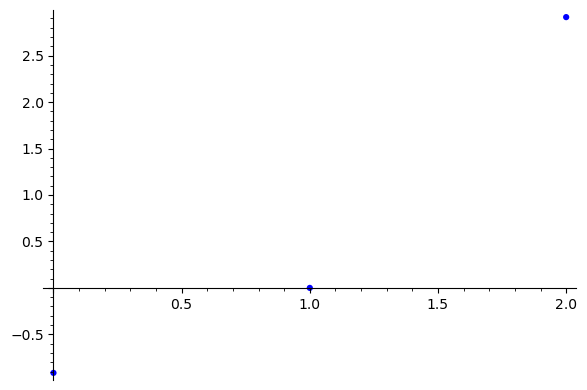

polynomial # -12*x^6 + 48*x^5 - 704*x^4 + 1332*x^3 + 2008*x^2 + 32*x


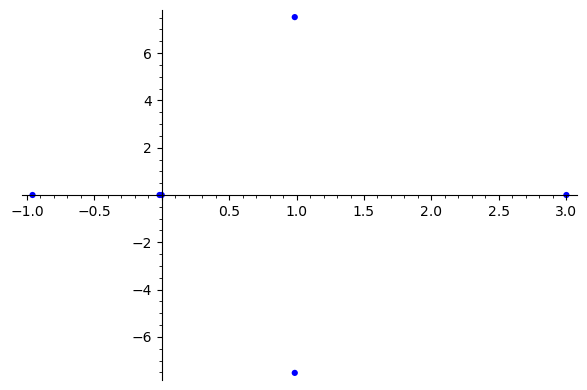

polynomial # 32*x^9 - 64*x^8 + 38912/27*x^7 - 12800/3*x^6 + 617984/27*x^5 - 142336/3*x^4 - 1970392/27*x^3 + 16*x^2 + 64/3*x


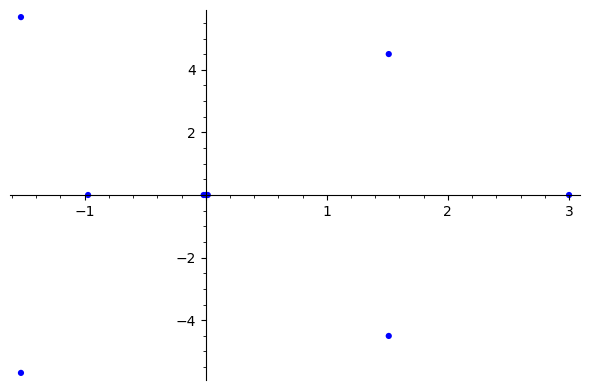

polynomial # -6*x^12 + 48*x^11 - 41152/9*x^10 + 92096/9*x^9 - 2807872/27*x^8 + 2535680/9*x^7 - 20623198/27*x^6 + 16667432/9*x^5 + 78748448/27*x^4 - 672*x^3 - 992*x^2


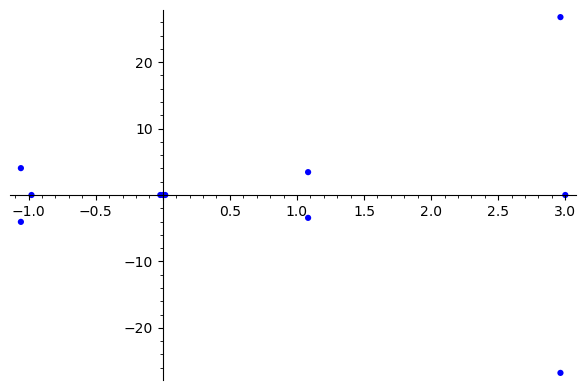

polynomial # 144/5*x^15 - 288/5*x^14 + 5986688/1125*x^13 - 3661312/225*x^12 + 299741696/675*x^11 - 232659968/225*x^10 + 21124308992/3375*x^9 - 3766673408/225*x^8 + 16841273344/675*x^7 - 17211891712/225*x^6 - 413041197056/3375*x^5 - 24/5*x^3 + 48/5*x^2 + 64/5*x


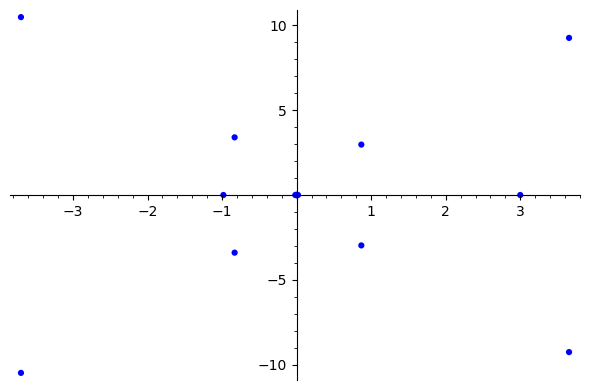

polynomial # -16*x^18 + 64*x^17 - 33780736/3375*x^16 + 28589824/1125*x^15 - 29316011776/30375*x^14 + 1729624064/675*x^13 - 1082256515072/30375*x^12 + 31909781504/375*x^11 - 3472814206976/10125*x^10 + 212679602672/225*x^9 - 22816987491104/30375*x^8 + 3686528011264/1125*x^7 + 161099555119004/30375*x^6 - 309424/27*x^5 + 71872/3*x^4 + 973100/27*x^3 - 2008/3*x^2 - 32/3*x


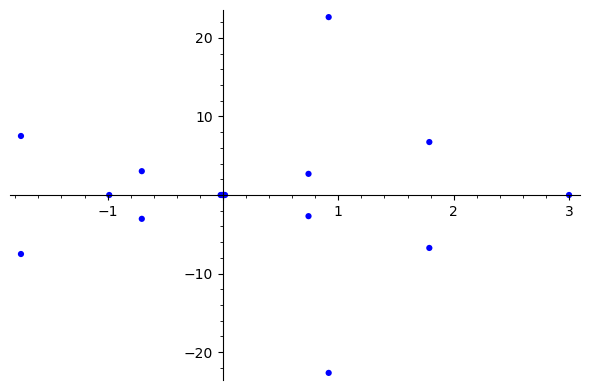

polynomial # 192/7*x^21 - 384/7*x^20 + 5032354816/385875*x^19 - 2071626752/55125*x^18 + 3138457060352/1488375*x^17 - 8091908810752/1488375*x^16 + 512208188284928/4465125*x^15 - 432978638569472/1488375*x^14 + 79458143894388736/31255875*x^13 - 3094290316623872/496125*x^12 + 1053538586722304/59535*x^11 - 77170599413940224/1488375*x^10 + 80229550865514496/4465125*x^9 - 214302874423263232/1488375*x^8 - 7349609162648584192/31255875*x^7 - 24/7*x^3 + 48/7*x^2 + 64/7*x


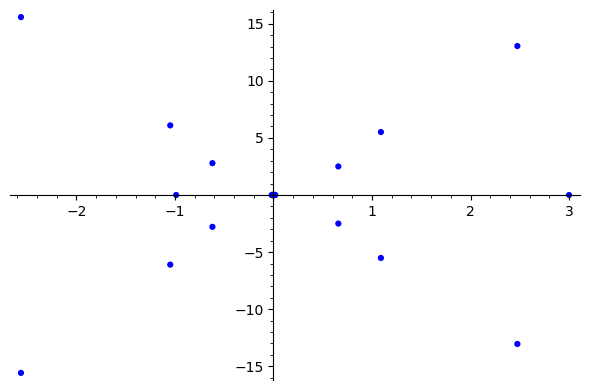

polynomial # -3*x^24 + 48*x^23 - 7471283264/385875*x^22 + 19236926528/385875*x^21 - 40266197984704/10418625*x^20 + 441897083648/42525*x^19 - 1408947429797888/4465125*x^18 + 398364990073856/496125*x^17 - 22892256654111232/2083725*x^16 + 57269553016950784/2083725*x^15 - 5233003059228983296/31255875*x^14 + 18060513214676992/42525*x^13 - 3892857145570187857/4465125*x^12 + 277119578380216744/99225*x^11 - 329860217670521056/3472875*x^10 + 67161283278848535328/10418625*x^9 + 331438310946681277216/31255875*x^8 - 1267840/9*x^7 + 10311680/27*x^6 - 8333824/9*x^5 - 39369472/27*x^4


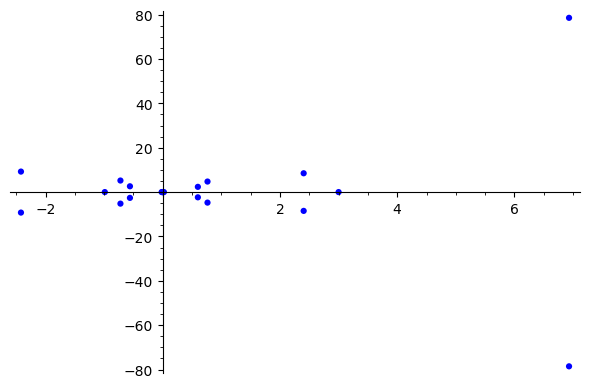

polynomial # 104/3*x^27 - 208/3*x^26 + 628196236096/31255875*x^25 - 72003971584/1157625*x^24 + 1920364361846272/281302875*x^23 - 26732234005504/1488375*x^22 + 1869145766603751424/2531725875*x^21 - 25758976588619776/13395375*x^20 + 31765529317172727808/843908625*x^19 - 8887944760131100672/93767625*x^18 + 776502433354453581824/843908625*x^17 - 30921633708525617152/13395375*x^16 + 26324538932014743420928/2531725875*x^15 - 73662277083154087936/2679075*x^14 + 6955893869924753342464/168781725*x^13 - 557387028374063415296/3750705*x^12 - 985283134323551633408/33756345*x^11 - 3922075530374637682688/13395375*x^10 - 1226729156997683227968032/2531725875*x^9 + 64/3*x^8 - 38912/81*x^7 + 12800/9*x^6 - 617984/81*x^5 + 142336/9*x^4 + 1970176/81*x^3


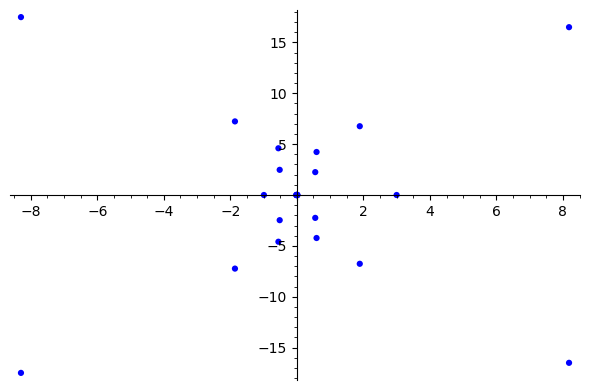

polynomial # -72/5*x^30 + 288/5*x^29 - 62929274752/2083725*x^28 + 855080965504/10418625*x^27 - 24371623632558464/2344190625*x^26 + 13446080952879104/468838125*x^25 - 2217996890942685184/1406514375*x^24 + 1926437823224897536/468838125*x^23 - 760176745580079296512/7032571875*x^22 + 14401813219309371392/52093125*x^21 - 1800611133862950404096/468838125*x^20 + 4518276953131008458752/468838125*x^19 - 494132574097625082560512/7032571875*x^18 + 83770118763199221727232/468838125*x^17 - 867803903348040817180672/1406514375*x^16 + 268186351645108217922856/156279375*x^15 - 4373820799057886709160624/2344190625*x^14 + 15125099016930466182592/1929375*x^13 + 457463864699122445967616/156279375*x^12 + 2102222827722624191980288/156279375*x^11 + 52450846697876390378180096/2344190625*x^10 - 10562154496/3375*x^9 + 1883336704/225*x^8 - 8420636672/675*x^7 + 8605946396/225*x^6 + 206520566128/3375*x^5 + 704/5*x^4 - 1332/5*x^3 - 2008/5*x^2 - 32/5*x


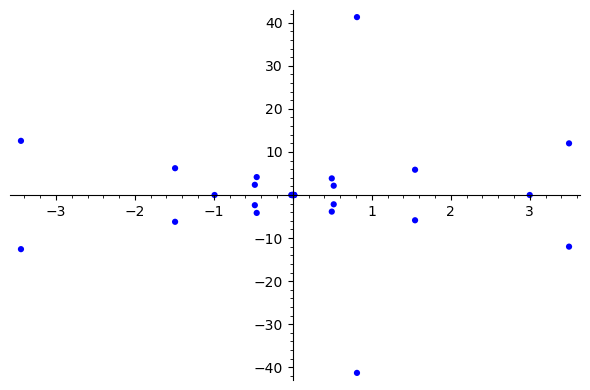

polynomial # 288/11*x^33 - 576/11*x^32 + 96373821473792/2773437975*x^31 - 126714357725696/1260653625*x^30 + 22951212215288462848/1418235328125*x^29 - 62818834605683485696/1418235328125*x^28 + 12817020192679941738496/4254705984375*x^27 - 973389586088676130816/121563028125*x^26 + 71744204852097110622208/260492203125*x^25 - 3015821582028711629324288/4254705984375*x^24 + 168481613541441802439753728/12764117953125*x^23 - 9481671299592873649635328/283647065625*x^22 + 5460079242043778722204745728/15600588609375*x^21 - 535506961721202788879826944/607815140625*x^20 + 63980518739446906459456012288/12764117953125*x^19 - 11084932311760577293604356096/850941196875*x^18 + 450208928606896918540092178432/12764117953125*x^17 - 49253850169715879275713789952/472745109375*x^16 + 341084627481672321810191876096/4254705984375*x^15 - 49951697139602023344813113344/121563028125*x^14 - 2694324769290328325920535871488/12764117953125*x^13 - 2653968078020363521861980520448/4254705984375*x^12 - 146318874763639791529

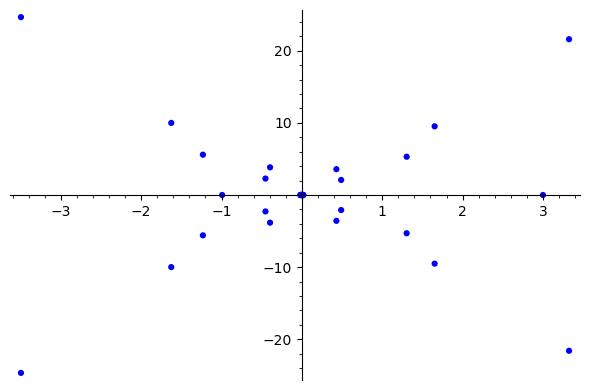

In [13]:
import pickle
rfile = open('/Users/barrybrent/2sept22no2.txt','rb') #deltaDiamondStrike Euler exponent polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..10]:
    print("=====================================================================================")
    points=[]
    n=s[k][1]
    print("polynomial #",n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        roots=roots+[root]
       
    rootplot=list_plot(roots,color='blue',size=20)
    show(rootplot)

In [14]:
len(s)

67

polynomial # 1632/67*x^201 - 3264/67*x^200 + 35783436005879304473807702288360797187721506524789656584524276066944023451312375965696/25279576704397916454950951527727068936875773911899840706903146762698057079200625*x^199 - 39876323608761444433556420411664460290291072488093286979908004366865290087648811454976/9432677874775341960802593853629503334655139519365612204068338344290319805671875*x^198 + 25871575909087997215770542292224184609381336979824629493075702600630692290308201662421335622948692947674905865969122288968812032/866799605010883774278552648081675109636321691039507179663928044966311809343089629840466666972087091142319364990234375*x^197 - 76453744639632140057753311902096372674503702796085778832424396507223751233898072912160139099261374118418380132130969718910680064/866799605010883774278552648081675109636321691039507179663928044966311809343089629840466666972087091142319364990234375*x^196 + 7116234116181117608494280272073551849429787779026847359895104536487064257954262882025213936599

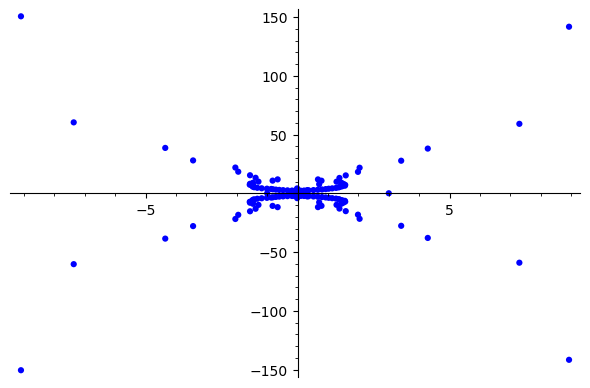

In [15]:
import pickle
rfile = open('/Users/barrybrent/2sept22no2.txt','rb') #deltaDiamondStrike Euler exponent polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [66..66]:
    print("=====================================================================================")
    points=[]
    n=s[k][1]
    print("polynomial #",n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        roots=roots+[root]
       
    rootplot=list_plot(roots,color='blue',size=20)
    show(rootplot)